<a href="https://colab.research.google.com/github/deborahmasibo/BRAIN-TUMOR-DETECTION-USING-NEURAL-NETWORK/blob/main/Brain_Tumor_Classsification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BRAIN TUMOR DETECTION

## 1. Defining the Question

### a) Specifying the Question

To detect the presence or absence of brain tumors and accurately classify the type of detected tumor as either a meningioma, glioma or pituitary tumor

### b) Defining the Metric for Success

The model will be considered successful, if it can achieve:
1. Accuracy of > 90%.
2. Class F1 scores > 90%.
3. Precision scores > 90%.

### c) Understanding the context

Brain tumor is the growth of abnormal cells in the tissues of the brain. Brain tumors can be benign (non cancerous) or malignant (cancerous cells), National Cancer Institute. 
 
When a brain tumor grows large enough such that it presses on surrounding nerves, blood vessels and tissues, it can impair brain functionality whether it is cancerous or not. Only about one-third of brain tumors are cancerous.
Tumors that develop in the brain are called primary tumors. Tumors that spread to the brain after forming in different parts of the body like breast, lung, prostate, large bowel (colon), kidney and skins are called secondary tumors or metastatic tumors. 
 
The most common type of primary tumor is the glioma tumor. About 33% of all brain tumors are gliomas. The tumor originates in the glial cells that surround and support neurons in the brain (Johns Hopkins). Meningiomas are also common, and form 30% of all brain tumors (Johns Hopkins). The tumor arises from the meninges, therefore, technically, it is not a brain tumor but is included in this category as it compresses the adjacent brain, nerves and blood vessels (Mayo Clinic). According to the National Cancer Institute, a majority of the tumors are benign. The final example of a primary tumor is a pituitary tumor. They are abnormal growths that develop in the pituitary gland. The tumor can cause over or underproduction of hormones that regulate important functions of the body. Most pituitary tumors are benign and do not spread to other parts of the body (Mayo Clinic). 
 
In Kenya, in the Global Burden of Diseases Study of 2016 published in the Lancet in 2019, it was estimated that 4.3 people in every 100,000 are diagnosed with brain tumors each year,  Nation Africa.
With a population of 47.5 million at the last Kenyan census, that would give an approximate number of 2,200 people per year who get a new diagnosis of a brain tumor, or 42 people per week or 6 people per day.


### d). Recording the Experimental Design

- Data sourcing/loading
- Data Understanding
- Data Relevance
- External Dataset Validation
- Data Preparation
- Descriptive analysis
- Modeling: neural networks
- Implementation of the solution

### e) Data Relevance

The dataset to use for this project can be found by following this link:
https://bit.ly/3lgmn4o


Assumptions

We shall assume the data is accurate



## 2. Importing the Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
import os
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

## 3. Exploratory Data Analysis (EDA)

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Changing our current directory and accesing the working directory
os.chdir('/content/gdrive/MyDrive/Core/Machine Learning/Project/Datasets')


In [ ]:
# Train dataset directory
train_dir = "/content/gdrive/MyDrive/Core/Machine Learning/Project/Datasets/Training"
# Class directories
number_classes = {'no_tumor': len(os.listdir("/content/gdrive/MyDrive/Core/Machine Learning/Project/Datasets/Training/no_tumor")),
                  'glioma_tumor': len(os.listdir("/content/gdrive/MyDrive/Core/Machine Learning/Project/Datasets/Training/glioma_tumor")),
                  'meningioma_tumor': len(os.listdir("/content/gdrive/MyDrive/Core/Machine Learning/Project/Datasets/Training/meningioma_tumor")),
                  'pituitary_tumor': len(os.listdir("/content/gdrive/MyDrive/Core/Machine Learning/Project/Datasets/Training/pituitary_tumor"))}

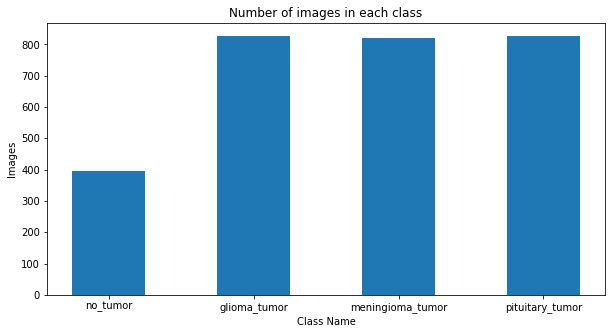

In [ ]:
# Class frequency plot
fig, ax = plt.subplots(figsize=(10, 5))

plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of images in each class");
plt.xlabel('Class Name');
plt.ylabel('Images');

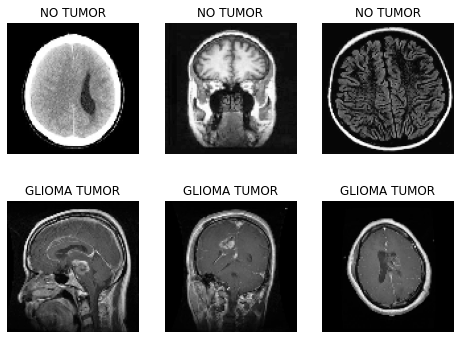

(395, 826)

In [ ]:
train_dir = "/content/gdrive/MyDrive/Core/Machine Learning/Project/Datasets/Training/" # image folder
# get the list of jpgs from sub image class folders
def get_images(base_dir, path, extenstion = ".jpg"):
  return [fn for fn in os.listdir(f'{base_dir}{path}') if fn.endswith(extenstion)]

no_tumor_imgs = get_images(train_dir, "no_tumor")
glioma_imgs = get_images(train_dir, "glioma_tumor")
meningioma_imgs = get_images(train_dir, "meningioma_tumor")
pituitary_imgs = get_images(train_dir, "pituitary_tumor")

# randomly select 3 of each
def random_select(image):
  return np.random.choice(image, 3, replace = False)

select_no_tumor = random_select(no_tumor_imgs)
select_glioma = random_select(glioma_imgs)
select_meningioma = random_select(meningioma_imgs)
select_pituitary = random_select(pituitary_imgs)

# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}/no_tumor/{select_no_tumor[i]}'
        label = 'NO TUMOR'
    else:
        fp = f'{train_dir}/glioma_tumor/{select_glioma[i-3]}'
        label = 'GLIOMA TUMOR'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

# also check the number of files here
len(no_tumor_imgs), len(glioma_imgs)


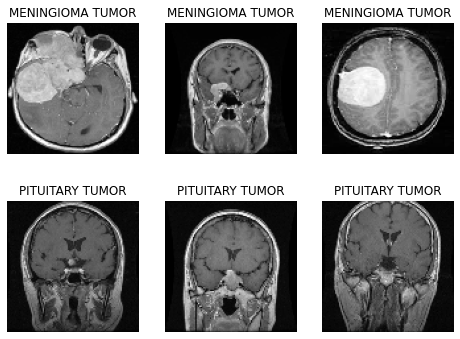

(822, 827)

In [ ]:
# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}/meningioma_tumor/{select_meningioma[i]}'
        label = 'MENINGIOMA TUMOR'
    else:
        fp = f'{train_dir}/pituitary_tumor/{select_pituitary[i-3]}'
        label = 'PITUITARY TUMOR'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

# also check the number of files here
len(meningioma_imgs), len(pituitary_imgs)

In [ ]:
# changing the image from a 2d to a 1d so that it can be read by the machine and the average of each group to be calculated.
# We create a function that runs through the folders, takes photos, turns them into a 1d from a 2d
#making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
no_tumor_images = img2np(f'{train_dir}/no_tumor/', no_tumor_imgs)
glioma_tumor_images = img2np(f'{train_dir}/glioma_tumor/', glioma_imgs)
meningioma_tumor_images = img2np(f'{train_dir}/meningioma_tumor/', meningioma_imgs)
pituitary_tumor_images = img2np(f'{train_dir}/pituitary_tumor/', pituitary_imgs)

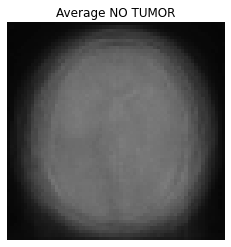

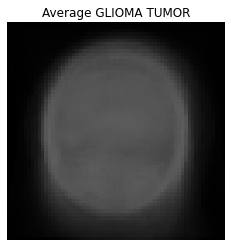

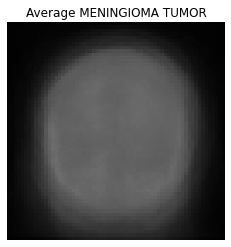

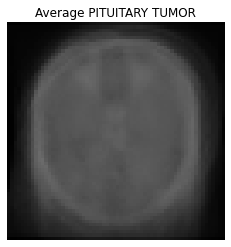

In [ ]:
# after converting the images t a 1D from a 2D, we create a fucntion that does the average of each category
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    fig.tight_layout()
    plt.show()
    return mean_img

no_tumor_mean = find_mean_img(no_tumor_images, 'NO TUMOR')
glioma_mean = find_mean_img(glioma_tumor_images, 'GLIOMA TUMOR')
meningioma_mean = find_mean_img(meningioma_tumor_images, 'MENINGIOMA TUMOR')
pituitary_mean = find_mean_img(pituitary_tumor_images, 'PITUITARY TUMOR')

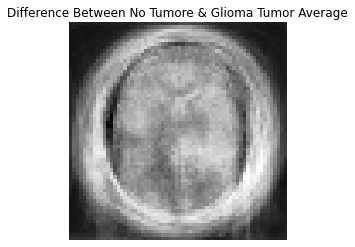

In [ ]:
contrast_mean = no_tumor_mean - glioma_mean
plt.imshow(contrast_mean, cmap='Greys_r')
plt.title(f'Difference Between No Tumore & Glioma Tumor Average')
plt.axis('off')
plt.show()

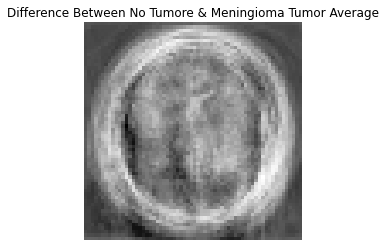

In [ ]:
contrast_mean = no_tumor_mean - meningioma_mean
plt.imshow(contrast_mean, cmap='Greys_r')
plt.title(f'Difference Between No Tumore & Meningioma Tumor Average')
plt.axis('off')
plt.show()

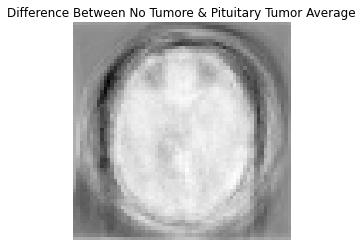

In [ ]:
contrast_mean = no_tumor_mean - pituitary_mean
plt.imshow(contrast_mean, cmap='Greys_r')
plt.title(f'Difference Between No Tumore & Pituitary Tumor Average')
plt.axis('off')
plt.show()

Number of PC:  43


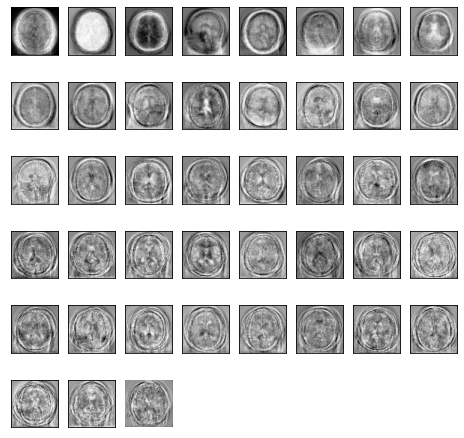

Number of PC:  82


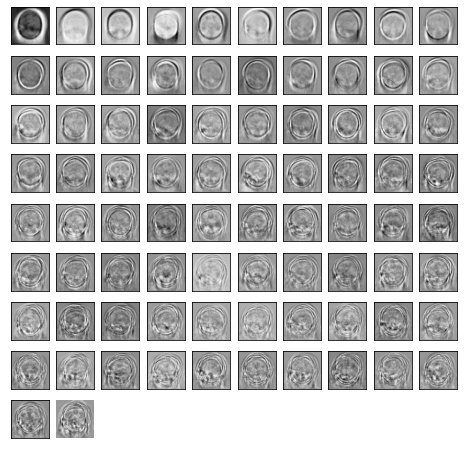

Number of PC:  63


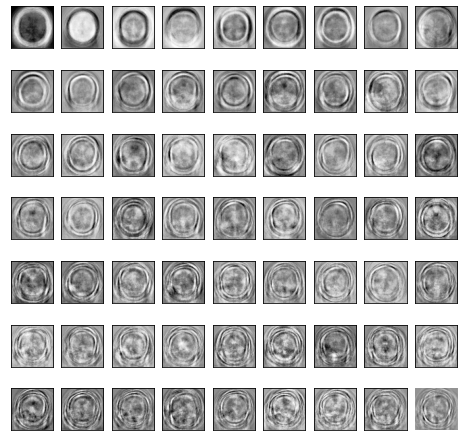

Number of PC:  73


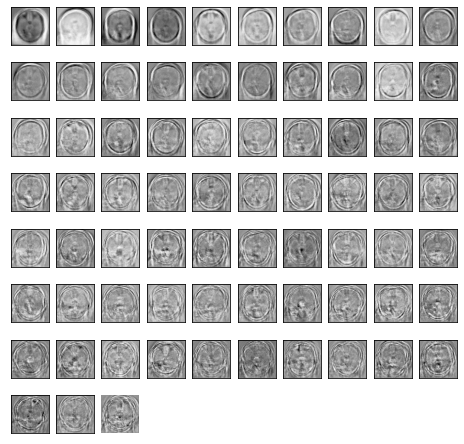

In [ ]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()

plot_pca(eigenimages(no_tumor_images, 'NO TUMOR'))
plot_pca(eigenimages(glioma_tumor_images, 'GLIOMA TUMOR'))
plot_pca(eigenimages(meningioma_tumor_images, 'MENINGIOMA TUMOR'))
plot_pca(eigenimages(pituitary_tumor_images, 'PITUITARY TUMOR'))

##4. External Dataset Validation

The dataset contains real patient MRI scans, therefore, the data is valid.

## 5. Modeling

### Train and test sets

In [ ]:
# Function used to generate the training and testing sets by combining all
# images into just a training and test set.
def train_test_1set(size, labels):
  # Train sets
  X_train, X_test, y_train, y_test = [], [], [], []
  # Folder paths
  # Training set
  for label in labels:
    folderPath = os.path.join('../Dataset','Training',label)
    # Getting unique file names and using them to finish the file path
    # Display progress
    for unique in tqdm(os.listdir(folderPath)):
        # Reading images 
        image = cv2.imread(os.path.join(folderPath, unique))
        # Set image size to the defined size
        image = cv2.resize(image,(size, size))
        # Appending the image to the X train set
        X_train.append(image)
        # Appending the label for the corresponding image
        y_train.append(label)

  # Testing set     
  for label in labels:
      folderPath = os.path.join('../Dataset','Testing',label)
      # Getting unique file names and using them to finish the file path
      # Display progress
      for unique in tqdm(os.listdir(folderPath)):
          # Reading the image
          image = cv2.imread(os.path.join(folderPath, unique))
          # Resizing the image according to the specified value
          image = cv2.resize(image,(size,size))
          # Appending the image to the train set
          X_train.append(image)
          # Appending the label of the correcponding image to the test set
          y_train.append(label)
          # Creating numpy arrays
  return X_train, y_train

In [ ]:
# Function used to generate the training and testing sets according to the
# original divisions.
def train_test_2sets(size, labels):
  # Train sets
  X_train, X_test, y_train, y_test = [], [], [], []
  # Folder paths
  # Training set
  for label in labels:
    folderPath = os.path.join('../Dataset','Training',label)
    # Getting unique file names and using them to finish the file path
    # Display progress
    for unique in tqdm(os.listdir(folderPath)):
        # Reading images 
        image = cv2.imread(os.path.join(folderPath, unique))
        # Set image size to the defined size
        image = cv2.resize(image,(size, size))
        # Appending the image to the X train set
        X_train.append(image)
        # Appending the label for the corresponding image
        y_train.append(label)

  # Testing set     
  for label in labels:
      folderPath = os.path.join('../Dataset','Testing',label)
      # Getting unique file names and using them to finish the file path
      # Display progress
      for unique in tqdm(os.listdir(folderPath)):
          # Reading the image
          image = cv2.imread(os.path.join(folderPath, unique))
          # Resizing the image according to the specified value
          image = cv2.resize(image,(size,size))
          # Appending the image to the train set
          X_test.append(image)
          # Appending the label of the correcponding image to the test set
          y_test.append(label)
          # Creating numpy arrays
  return X_train, X_test, y_train, y_test

In [ ]:
# Image folder labels
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

# Funcion call
X_train, y_train = train_test_1set(150, labels)

100%|██████████| 74/74 [00:00<00:00, 91.06it/s]


In [ ]:
# Two sets
X2_train, X2_test, y2_train, y2_test = train_test_2sets(150, labels)

100%|██████████| 74/74 [00:00<00:00, 88.06it/s]


In [ ]:
# Converting to array
X_train = np.array(X_train)
y_train = np.array(y_train)
X2_train = np.array(X2_train)
X2_test = np.array(X2_test)
y2_train = np.array(y2_train)
y2_test = np.array(y2_test)
# Dataset shapes
print('Dataset shapes')
print(f'{"-"*30}\n')
print('First set:')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}\n')
print('Second set:')
print(f'X_train: {X2_train.shape}')
print(f'X_test: {X2_test.shape}')
print(f'y_train: {y2_train.shape}')
print(f'y_test: {y2_test.shape}')

Dataset shapes
------------------------------

First set:
X_train: (3263, 150, 150, 3)
y_train: (3263,)

Second set:
X_train: (2869, 150, 150, 3)
X_test: (394, 150, 150, 3)
y_train: (2869,)
y_test: (394,)


The feature sets have 3 channels, indicating that the images are in RGB format.

### Shuffling and Label Encoding

**Shuffling**

*First set*

In [ ]:
# Shuffling the training sets to randomize the order
X_train, y_train = shuffle(X_train, y_train, random_state=0)

Train-test-split

In [ ]:
# Train-test-split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state = 0)

*Second Set*

In [ ]:
# Shuffling
X2_train, y2_train = shuffle(X2_train, y2_train, random_state = 0)
X2_test, y2_test = shuffle(X2_test, y2_test, random_state = 0)

**Encoding**

*Label Encoding*

In [ ]:
# Label encoding
y1_train = LabelEncoder().fit_transform(y_train)
y1_test = LabelEncoder().fit_transform(y_test)
y2_train = LabelEncoder().fit_transform(y2_train)
y2_test = LabelEncoder().fit_transform(y2_test)

*One-Hot Encoding*

In [ ]:
# One-Hot Encoding
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y3_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y3_test = tf.keras.utils.to_categorical(y_test)

### Convolutional Neural Networks

In [ ]:
# Model evaluation line plot
def History(hist):
  fig, ax = plt.subplots(figsize = (10, 5))
  plt.plot(hist.history['accuracy'], label = 'Accuracy')
  plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0.5, 1])
  plt.legend(loc = 'upper right')
  plt.show()

In [ ]:
# First CNN model function
def Model1(shape, labels, X_train, X_test, y_train, y_test, loss = 'sparse_categorical_crossentropy'):
  # Model definition
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
            kernel_initializer = 'he_uniform', input_shape = shape))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  # print('CNN Layer Model Summary\n')
  # print(model.summary())
  # AddinG dense layers on top
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(len(labels), activation = 'softmax'))
  # Model summary
  # print('\nMLP Layer Model Summary\n')
  # print(model.summary())
  # Model Evaluation
  # Defining the loss and optimizer
  model.compile(optimizer = 'adam', loss = loss,
              metrics = ['accuracy'])
  # Fitting the model
  history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))
  print('\nModel Evaluation\n')
  # Plotting the train and validation accuracy line graphs
  History(history)
  print()
  print()
  # Accuracy
  print('\nModel Accuracy and Loss\n')
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f'Test Accuracy: {test_acc}')
  print(f'TestLoss: {test_loss}')
  print()
  print()
  # Prediction
  pred = np.argmax(model.predict(X_test), axis = -1)
  # Classification report
  print('\nClassification Report\n')
  report = classification_report(y_test, pred)
  print(report)
  print()
  print()
  # Heatmap
  fig, ax = plt.subplots(figsize = (10, 8))
  sns.heatmap(confusion_matrix(y_test, pred), xticklabels=labels, yticklabels=labels,annot=True,
            cmap='viridis', fmt = 'g')
  plt.title('Heatmap', y = 1.05);

  
  

In [ ]:
# Second model function
def Model2(shape, labels, X_train, X_test, y_train, y_test, loss = 'categorical_crossentropy'):
  # Model definition
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
            kernel_initializer = 'he_uniform', input_shape = shape))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  # print('CNN Layer Model Summary\n')
  # print(model.summary())
  # Adding dense layers on top
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(len(labels), activation = 'softmax'))
  # Model summary
  # print('\nMLP Layer Model Summary\n')
  # print(model.summary())
  # Model Evaluation
  # Defining the loss and optimizer
  model.compile(optimizer = 'adam', loss = loss,
              metrics = ['accuracy'])
  # Fitting the model
  history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))
  print('\nModel Evaluation\n')
  # Plotting the train and validation accuracy ine plots
  History(history)
  print()
  print()
  # Accuracy
  print('\nModel Accuracy and Loss\n')
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f'Test Accuracy: {test_acc}')
  print(f'TestLoss: {test_loss}')
  print()
  print()
  # Prediction
  pred = model.predict(X_test)
  pred = np.argmax(pred,axis=1)
  y_test_new = np.argmax(y_test,axis=1)
  # Classification report
  print('\nClassification Report\n')
  report = classification_report(y_test_new, pred)
  print(report)
  print()
  print()
  # Heatmap
  fig, ax = plt.subplots(figsize = (10, 8))
  sns.heatmap(confusion_matrix(y_test_new, pred), xticklabels=labels, yticklabels=labels,annot=True,
            cmap='viridis', fmt = 'g')
  plt.title('Heatmap', y = 1.05);

  
  

In [ ]:
# Input features shape
shape = X_train.shape[1:]
shape

(150, 150, 3)

**First Model**

Epoch 1/10
92/92 [==============================] - 13s 29ms/step - loss: 9.5488 - accuracy: 0.4854 - val_loss: 0.8459 - val_accuracy: 0.6391
Epoch 2/10
92/92 [==============================] - 2s 22ms/step - loss: 0.9169 - accuracy: 0.6189 - val_loss: 0.7448 - val_accuracy: 0.6575
Epoch 3/10
92/92 [==============================] - 2s 22ms/step - loss: 0.7559 - accuracy: 0.6890 - val_loss: 0.7259 - val_accuracy: 0.7187
Epoch 4/10
92/92 [==============================] - 2s 22ms/step - loss: 0.6689 - accuracy: 0.7224 - val_loss: 0.6493 - val_accuracy: 0.7554
Epoch 5/10
92/92 [==============================] - 2s 21ms/step - loss: 0.6407 - accuracy: 0.7411 - val_loss: 0.6527 - val_accuracy: 0.7309
Epoch 6/10
92/92 [==============================] - 2s 21ms/step - loss: 0.5807 - accuracy: 0.7715 - val_loss: 0.5945 - val_accuracy: 0.7645
Epoch 7/10
92/92 [==============================] - 2s 21ms/step - loss: 0.4845 - accuracy: 0.8093 - val_loss: 0.6074 - val_accuracy: 0.7676
Epoch 8/10
9

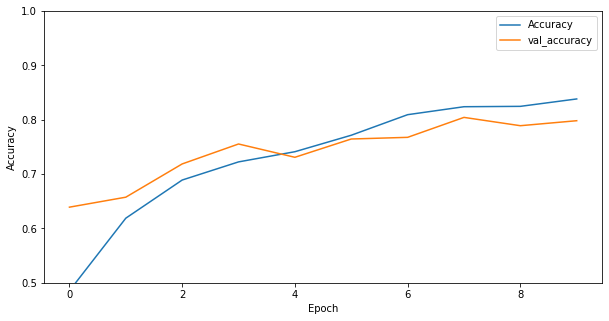




Model Accuracy and Loss

11/11 [==============================] - 0s 10ms/step - loss: 0.5702 - accuracy: 0.7982
Test Accuracy: 0.7981651425361633
TestLoss: 0.5701836943626404



Classification Report

              precision    recall  f1-score   support

           0       0.92      0.70      0.79       110
           1       0.67      0.79      0.73        82
           2       0.75      0.69      0.72        48
           3       0.84      0.99      0.91        87

    accuracy                           0.80       327
   macro avg       0.79      0.79      0.79       327
weighted avg       0.81      0.80      0.80       327





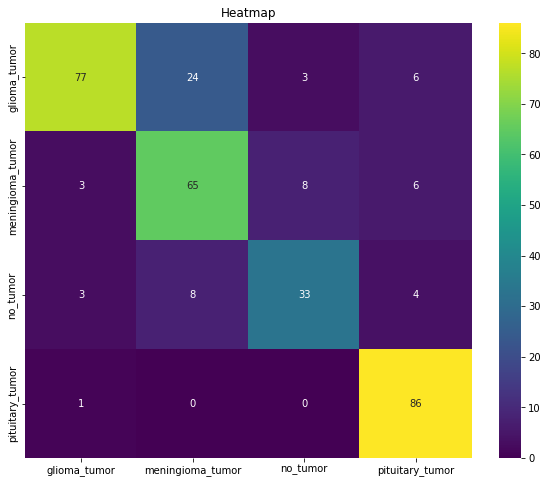

In [ ]:
# 1st dataset, label encoded target
Model1(shape, labels, X_train, X_test, y1_train, y1_test)

Performance metrics such as accuracy and F1 scores vary every time the model function is executed. The accuracy, for example, varies from 20% to 80%. Therefore, the model has an unstable performance.

**Second Model**

Epoch 1/10
90/90 [==============================] - 3s 29ms/step - loss: 7.2778 - accuracy: 0.3566 - val_loss: 1.3932 - val_accuracy: 0.1929
Epoch 2/10
90/90 [==============================] - 2s 22ms/step - loss: 1.2597 - accuracy: 0.3994 - val_loss: 1.4047 - val_accuracy: 0.1777
Epoch 3/10
90/90 [==============================] - 2s 22ms/step - loss: 1.2392 - accuracy: 0.4235 - val_loss: 1.4586 - val_accuracy: 0.1751
Epoch 4/10
90/90 [==============================] - 2s 22ms/step - loss: 1.2035 - accuracy: 0.4409 - val_loss: 1.4790 - val_accuracy: 0.1701
Epoch 5/10
90/90 [==============================] - 2s 22ms/step - loss: 1.1498 - accuracy: 0.4772 - val_loss: 1.4290 - val_accuracy: 0.2030
Epoch 6/10
90/90 [==============================] - 2s 22ms/step - loss: 1.1355 - accuracy: 0.4702 - val_loss: 1.5160 - val_accuracy: 0.1980
Epoch 7/10
90/90 [==============================] - 2s 22ms/step - loss: 1.1244 - accuracy: 0.4845 - val_loss: 1.9935 - val_accuracy: 0.2589
Epoch 8/10
90

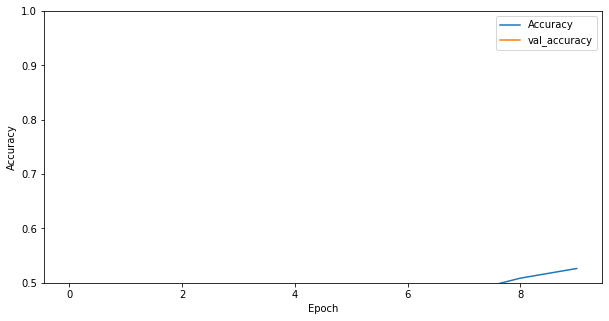




Model Accuracy and Loss

13/13 [==============================] - 0s 10ms/step - loss: 3.5165 - accuracy: 0.3503
Test Accuracy: 0.3502538204193115
TestLoss: 3.516509532928467



Classification Report

              precision    recall  f1-score   support

           0       0.70      0.16      0.26       100
           1       0.12      0.04      0.06       115
           2       0.32      0.53      0.40       105
           3       0.39      0.82      0.53        74

    accuracy                           0.35       394
   macro avg       0.38      0.39      0.31       394
weighted avg       0.37      0.35      0.29       394





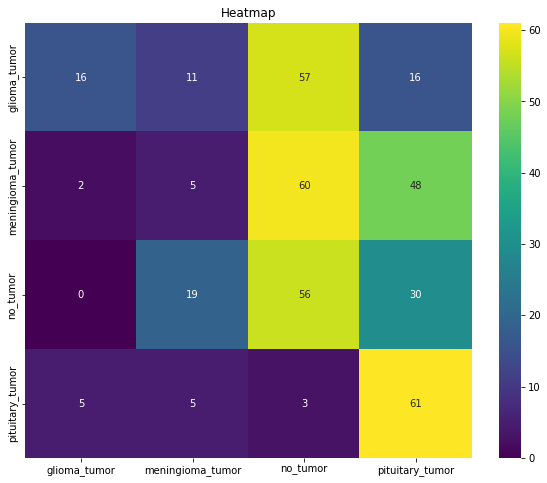

In [ ]:
# 2nd dataset, label encoded target
Model1(shape, labels, X2_train, X2_test, y2_train, y2_test, loss = 'sparse_categorical_crossentropy')

For the second dataset, model prediction accuracy drops to 35%. Though it varies every time the function is executed. The accuracy is always lower than the previous model, therefore, the second dataset will not be used.

**Third Model**

Epoch 1/10
92/92 [==============================] - 3s 24ms/step - loss: 19.1852 - accuracy: 0.4659 - val_loss: 0.9238 - val_accuracy: 0.5841
Epoch 2/10
92/92 [==============================] - 2s 23ms/step - loss: 0.9576 - accuracy: 0.5790 - val_loss: 0.8545 - val_accuracy: 0.6177
Epoch 3/10
92/92 [==============================] - 2s 22ms/step - loss: 0.8295 - accuracy: 0.6482 - val_loss: 0.7490 - val_accuracy: 0.6972
Epoch 4/10
92/92 [==============================] - 2s 22ms/step - loss: 0.6912 - accuracy: 0.7057 - val_loss: 0.6589 - val_accuracy: 0.7768
Epoch 5/10
92/92 [==============================] - 2s 23ms/step - loss: 0.6816 - accuracy: 0.7197 - val_loss: 0.6412 - val_accuracy: 0.7615
Epoch 6/10
92/92 [==============================] - 2s 23ms/step - loss: 0.5635 - accuracy: 0.7674 - val_loss: 0.5992 - val_accuracy: 0.7920
Epoch 7/10
92/92 [==============================] - 2s 22ms/step - loss: 0.5303 - accuracy: 0.7861 - val_loss: 0.5987 - val_accuracy: 0.8135
Epoch 8/10
9

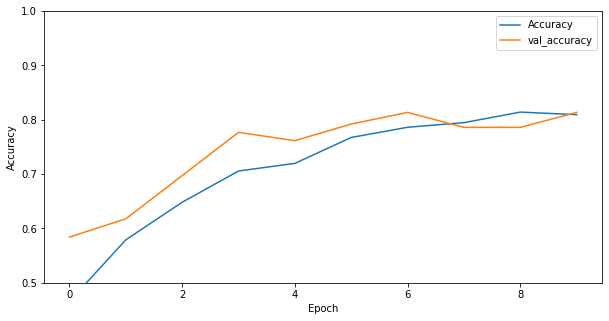




Model Accuracy and Loss

11/11 [==============================] - 0s 10ms/step - loss: 0.6625 - accuracy: 0.8135
Test Accuracy: 0.8134556412696838
TestLoss: 0.6625462770462036



Classification Report

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       110
           1       0.71      0.73      0.72        82
           2       0.70      0.90      0.79        48
           3       0.92      0.97      0.94        87

    accuracy                           0.81       327
   macro avg       0.80      0.83      0.81       327
weighted avg       0.82      0.81      0.81       327





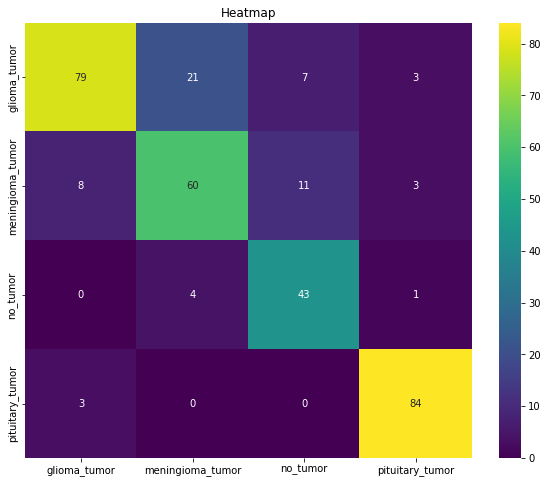

In [ ]:
# 1st dataset, one hot encoded target
Model2(shape, labels, X_train, X_test, y3_train, y3_test, loss = 'categorical_crossentropy')

* The accuracy increases to 80%. Though the accuracy varies for every execution of the model function, the accuracy never goes below 80%. 
* The F1 and precison scores of the model do not meet the set success criteria.
* This dataset has the highest average accuracy of the three models. Therefore, the first dataset, as well as the One-Hot encoded label column will be used.

**Fourth Model**

In [ ]:
# CNN function for the second model
def Model3(shape, labels, X_train, X_test, y_train, y_test, loss = 'categorical_crossentropy'):
  # Model definition
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape= shape))
  model.add(layers.MaxPool2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(len(labels), activation='softmax'))
  # Defining the loss and optimizer
  model.compile(optimizer='adam', loss= loss, metrics=['accuracy'])
  # Fitting the model
  history = model.fit(X_train, y_train, epochs=10, batch_size=128)
  # Accuracy
  print('\nModel Accuracy and Loss\n')
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f'Test Accuracy: {test_acc}')
  print(f'TestLoss: {test_loss}')
  print()
  print()
  # Prediction
  pred = model.predict(X_test)
  pred = np.argmax(pred,axis=1)
  y_test_new = np.argmax(y_test,axis=1)
  # Classification report
  print('\nClassification Report\n')
  report = classification_report(y_test_new, pred)
  print(report)
  print()
  print()
  # Heatmap
  fig, ax = plt.subplots(figsize = (10, 8))
  sns.heatmap(confusion_matrix(y_test_new, pred), xticklabels=labels, yticklabels=labels,annot=True,
            cmap='viridis', fmt = 'g')
  plt.title('Heatmap', y = 1.05);
  


Epoch 1/10
23/23 [==============================] - 2s 59ms/step - loss: 1116.5325 - accuracy: 0.2762
Epoch 2/10
23/23 [==============================] - 1s 43ms/step - loss: 1.3848 - accuracy: 0.2718
Epoch 3/10
23/23 [==============================] - 1s 42ms/step - loss: 1.3824 - accuracy: 0.2779
Epoch 4/10
23/23 [==============================] - 1s 43ms/step - loss: 1.3804 - accuracy: 0.2779
Epoch 5/10
23/23 [==============================] - 1s 42ms/step - loss: 1.3784 - accuracy: 0.2779
Epoch 6/10
23/23 [==============================] - 1s 43ms/step - loss: 1.3765 - accuracy: 0.2779
Epoch 7/10
23/23 [==============================] - 1s 43ms/step - loss: 1.3748 - accuracy: 0.2779
Epoch 8/10
23/23 [==============================] - 1s 43ms/step - loss: 1.3732 - accuracy: 0.2779
Epoch 9/10
23/23 [==============================] - 1s 43ms/step - loss: 1.3716 - accuracy: 0.2779
Epoch 10/10
23/23 [==============================] - 1s 43ms/step - loss: 1.3702 - accuracy: 0.2779

Model

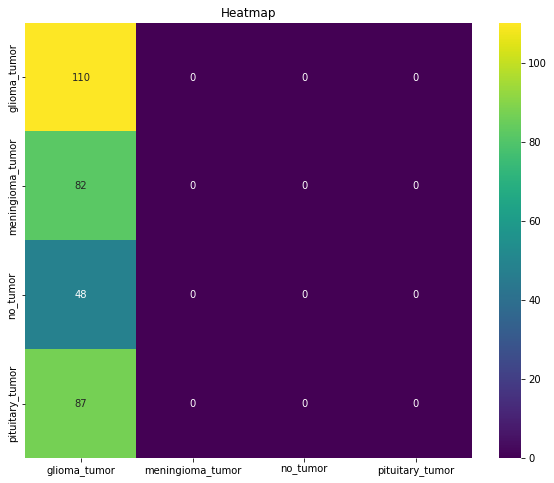

In [ ]:
# Function call
Model3(shape, labels, X_train, X_test, y3_train, y3_test, loss = 'categorical_crossentropy')

* The model has a persisting low accuracy that ranges from 20% to 35%. Therefore, decreasing the CNN layers leads to a subsequent low prediction accuracy of the model.
* The model is also completely biased towards the glioma tumour class, therefore, the model is also overfitting.

**Transfer Learning**

*EfficientNetB0*
This Keras application has a good trade-off between accuracy and time(ms) per inference step for both CPU and GPU [link](https://keras.io/api/applications/).

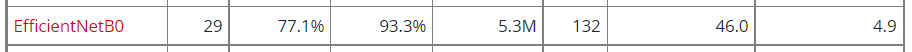



Function definition

In [ ]:
# Pre-trained model
def pre_trained_performance(shape, labels, X_train, X_test, y_train, y_test):
  # Pre-trained model
  efficient_net = EfficientNetB0(input_shape = shape, weights='imagenet',include_top=False)
  # Model definition
  model = efficient_net.output
  model = tf.keras.layers.GlobalAveragePooling2D()(model)
  model = tf.keras.layers.Dropout(rate=0.5)(model)
  model = tf.keras.layers.Dense(4,activation='softmax')(model)
  model = tf.keras.models.Model(inputs=efficient_net.input, outputs = model)
  # Model summary
  # model.summary()
  # Compiling the model
  model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
  # Model fit
  history = model.fit(X_train,y3_train,validation_data = (X_test, y3_test), epochs =12, verbose=1, batch_size=32)
  print('\nModel Evaluation\n')
  History(history)
  print()
  print()
  # Accuracy
  print('\nModel Accuracy and Loss\n')
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f'Test Accuracy: {test_acc}')
  print(f'TestLoss: {test_loss}')
  print()
  print()
  # Prediction
  pred = model.predict(X_test)
  pred = np.argmax(pred,axis=1)
  y_test_new = np.argmax(y_test,axis=1)
  # Classification report
  print('\nClassification Report\n')
  report = classification_report(y_test_new, pred)
  print(report)
  print()
  print()
  # Heatmap
  fig, ax = plt.subplots(figsize = (10, 8))
  sns.heatmap(confusion_matrix(y_test_new, pred), xticklabels=labels, yticklabels=labels,annot=True,
            cmap='viridis', fmt = 'g')
  plt.title('Heatmap', y = 1.05);


In [ ]:
# Saving the original model and a tflite model
def save_pretrained_model(shape, X_train, X_test, y_train, y_test):
  # Pre-trained model
  efficient_net = EfficientNetB0(input_shape = shape, weights='imagenet',include_top=False)
  # Model definition
  model = efficient_net.output
  model = tf.keras.layers.GlobalAveragePooling2D()(model)
  # Reduce overfitting
  model = tf.keras.layers.Dropout(rate=0.5)(model)
  model = tf.keras.layers.Dense(4,activation='softmax')(model)
  model = tf.keras.models.Model(inputs=efficient_net.input, outputs = model)
  # Compiling the model
  model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
  # Callbacks
  # Saving the logs
  tensorboard = TensorBoard(log_dir = 'logs')
  #Saving the model
  checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
  # Reduce learning rate once learning stagnates
  reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                                mode='auto',verbose=1)
  # Model fitting
  model.fit(X_train,y3_train,validation_data = (X_test, y3_test), epochs =12, verbose=1, batch_size=32, callbacks=[tensorboard,checkpoint,reduce_lr])
  converter = tf.lite.TFLiteConverter.from_keras_model(model)
  # Converting the model to a tflite model
  tflite_model = converter.convert()

  # Saving the tflite model
  with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

16719872/16705208 [==============================] - 0s 0us/step
Epoch 1/12
92/92 [==============================] - 28s 193ms/step - loss: 0.4508 - accuracy: 0.8351 - val_loss: 1.1125 - val_accuracy: 0.7584
Epoch 2/12
92/92 [==============================] - 15s 159ms/step - loss: 0.1741 - accuracy: 0.9353 - val_loss: 0.4606 - val_accuracy: 0.8410
Epoch 3/12
92/92 [==============================] - 15s 159ms/step - loss: 0.1144 - accuracy: 0.9629 - val_loss: 0.3749 - val_accuracy: 0.9083
Epoch 4/12
92/92 [==============================] - 15s 161ms/step - loss: 0.0891 - accuracy: 0.9659 - val_loss: 0.4328 - val_accuracy: 0.8869
Epoch 5/12
92/92 [==============================] - 14s 157ms/step - loss: 0.0837 - accuracy: 0.9714 - val_loss: 0.5440 - val_accuracy: 0.8899
Epoch 6/12
92/92 [==============================] - 15s 159ms/step - loss: 0.0819 - accuracy: 0.9772 - val_loss: 0.3912 - val_accuracy: 0.9205
Epoch 7/12
92/92 [==============================] - 15s 158ms/step - loss: 0.

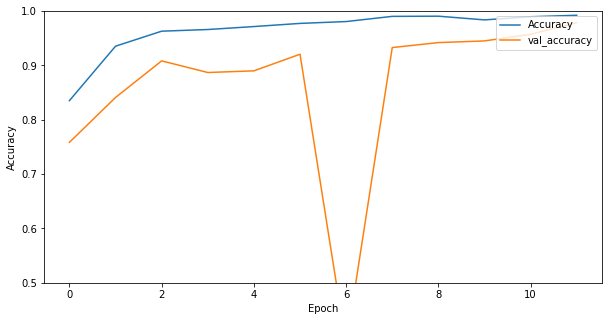




Model Accuracy and Loss

11/11 [==============================] - 0s 38ms/step - loss: 0.1172 - accuracy: 0.9786
Test Accuracy: 0.9785932898521423
TestLoss: 0.11721273511648178



Classification Report

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       110
           1       0.93      0.99      0.96        82
           2       1.00      1.00      1.00        48
           3       0.99      1.00      0.99        87

    accuracy                           0.98       327
   macro avg       0.98      0.98      0.98       327
weighted avg       0.98      0.98      0.98       327





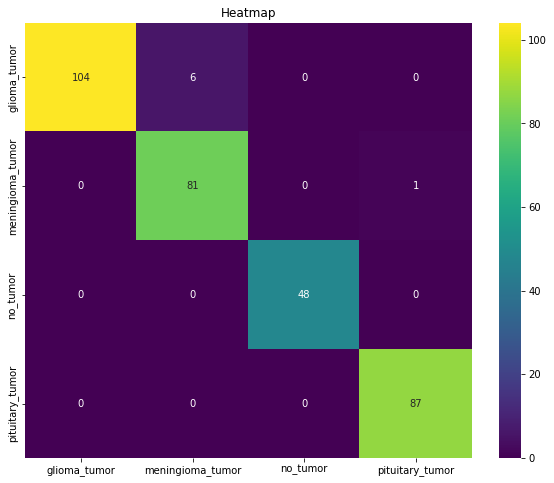

In [ ]:
# Employing the pretrained model
pre_trained_performance(shape, labels, X_train, X_test, y3_train, y3_test)

* The model accuracy becomes stable, achieving a high value of 96 - 97%. Instances of misclassification are low. More images can be used to train the model, in order to try and rectify this.
* Though the classes are imbalanced, each class achieves a high F1 score >=94% and high precision scores >= 93%.
* Therefore, this model has the highest and most stable prediction accuracy (performance). It will be used to implement the solution.

In [ ]:
# Saving the original model, as well as the tflite model
save_pretrained_model(shape, X_train, X_test, y3_train, y3_test)

Epoch 1/12
92/92 [==============================] - ETA: 0s - loss: 0.4248 - accuracy: 0.8457
Epoch 1: val_accuracy improved from -inf to 0.86239, saving model to effnet.h5
92/92 [==============================] - 43s 341ms/step - loss: 0.4248 - accuracy: 0.8457 - val_loss: 0.5169 - val_accuracy: 0.8624 - lr: 0.0010
Epoch 2/12
92/92 [==============================] - ETA: 0s - loss: 0.1960 - accuracy: 0.9387
Epoch 2: val_accuracy improved from 0.86239 to 0.94190, saving model to effnet.h5
92/92 [==============================] - 30s 323ms/step - loss: 0.1960 - accuracy: 0.9387 - val_loss: 0.2143 - val_accuracy: 0.9419 - lr: 0.0010
Epoch 3/12
92/92 [==============================] - ETA: 0s - loss: 0.1352 - accuracy: 0.9578
Epoch 3: val_accuracy did not improve from 0.94190
92/92 [==============================] - 27s 297ms/step - loss: 0.1352 - accuracy: 0.9578 - val_loss: 1.2097 - val_accuracy: 0.7431 - lr: 0.0010
Epoch 4/12
92/92 [==============================] - ETA: 0s - loss: 0.0

INFO:tensorflow:Assets written to: /tmp/tmp_9pbzaok/assets


These models will be deployed in a stramlit user interface.

**Model Performance Summary**

1. *Manually Trained Model - (One-Hot Encoded label)*
* Accuracy = 80% (varies for different instances of model fitting, but never goes below 80% or higher than 86% - unstable performance).
* High model bias towards the pituitary tumour class. (Other classes have an F1 score lower than 0.8, while the latter has an F1 score of 0.94).
* The precision of each class is below 90%, these values are inadequate, as the detection and classificication of brain tumours is a sensitive matter, and false predictions will not be tolerated.

2. *Model fitting on pre-trained model - (EfficientNetB0)*
* Accuracy = 98% (rounded off), a great improvement from the previous model. Furthermore, accuracy never goes below 96% every time the model is fit, therefore, it has a more stable and reliable perfomance.
* Though the classes are imbalanced, all classes have an F1 score >=96%, greatly reducing the bias previously seen in the preceding model.
* The model attains high class precision values >= 93%. Therefore, there are very few instances of false detections and classifications.



> A dropout layer (rate = 0.5) was used to reduce overfitting.



## 6. Implementing the Solution

The model application has been implemented and deployed on streamlit. 
1. Streamlit - [brain tumour classification application](https://share.streamlit.io/deborahmasibo/moringa-core-module-2-project/main/bt2/braintumour2.py)

2. Test dataset - [test set](https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/tree/master/Testing)


## 7. Challenging the Solution

Different CNN models have been trained, each with a varying perormance. 
1. The first model, trained on a train-test-split dataset, had a label encoded label. Its performance varied from an accuarcy as low as 20%, to 80%. Therefore, its performance was unstable and unreliable.
2. The second model, was trained on the original training and testing sets. It had a consistently poor accuracy of around 25%.
3. The third model was trained on a train-test-split dataset, but with a label OneHot encoded label. It had the highest prediction accuracy of > 80%, but lower that 87%.
4. The fourth model had fewer hidden layers. Its prediction accuracy was very low, averaging at around 25%.

> These models had varying accuracies every time the models were fit.

5. The final model was pre-trained using Keras' EfficientNetB0 model. The prediction accuracy ranged from 96 - 97%. Furthermore, the calss F1 scores were > 90%, and the precision scores were >= 93%. Therefore, this model was used to implement the final prediction model.

## 8. Conclusion

Modeling using transfer learning leads to very accurate predictions, and each class has an F1 score > 90%. The overall prediction accuracy is 96 - 97%, and precision scores are >= 93%, which meets the success criteria.

The tflite model performed predictions at a higher speed than the original model. It also had lower storage requirements, therefore, it was implemented in the streamlit web application.

## 9. Follow up questions

### a). Did we have the right data?

Yes, we have the right data, as brain MRI scans are used to detect brain tumours.


### b). Do we need other data to answer our question?

Yes, more data will improve the prediction accuracy of the model, as more patterns will be derived from varying images. Furthermore, more data can be used to rectify the class imbalance, in order to reduce model prediction bias.


### c). Did we have the right question?

Yes, as implementation of its solution has led to the development of a model with a high accuracy of 96 - 97%, F1 scores > 90% and precision scores >= 93%.


